# Predicting median house value

In [35]:
# PARAMETERS
n_estimators = 1

## Load

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn_evaluation import plot

In [54]:
plt.style.use('ggplot')
mpl.rcParams['figure.figsize'] = (12, 8)

In [55]:
df = pd.read_csv('../data/penguins.csv')

In [56]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## Plot

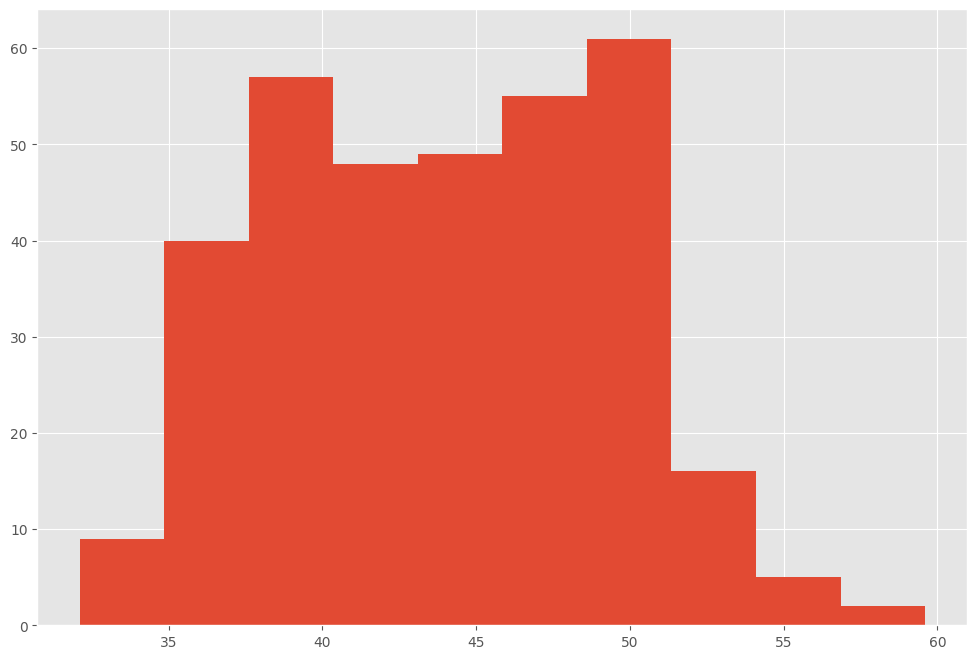

In [58]:
_ = plt.hist(df.bill_length_mm)

# Clean

In [23]:
# remove rows with NAs
df = df[df.isna().sum(axis=1) == 0].copy()

In [24]:
df['species'] = df.species.replace({'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2})

In [28]:
df['sex'] = df.sex.replace({'MALE': 0, 'FEMALE': 1})

In [39]:
df['island'] = df.island.replace({'Torgersen': 0, 'Biscoe': 1, 'Dream': 2})

## Train test split

In [41]:
from sklearn.model_selection import train_test_split  # noqa

In [42]:
X = df.drop('species', axis='columns')
y = df.species

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=42)

## Fit model

In [44]:
from sklearn.ensemble import RandomForestClassifier  # noqa

In [45]:
rf = RandomForestClassifier(n_estimators=n_estimators)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1)

In [46]:
y_pred = rf.predict(X_test)

## Evaluate

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        52
           1       0.90      0.95      0.93        20
           2       1.00      0.97      0.99        38

    accuracy                           0.96       110
   macro avg       0.96      0.96      0.96       110
weighted avg       0.96      0.96      0.96       110



<AxesSubplot: title={'center': 'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

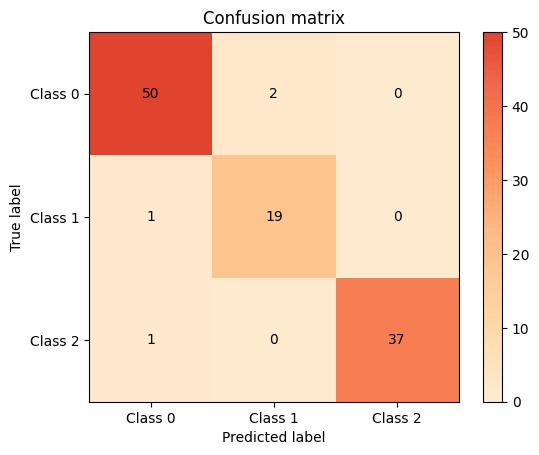

In [52]:
plt.style.use('default')
plot.confusion_matrix(y_test, y_pred)